In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats as sps
import seaborn as sns

In [9]:
data = pd.read_csv('/content/ab_stats.csv')

In [10]:
data.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [13]:
data.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [14]:
count_A = data[data['ab_group']=='A']['ab_group'].count()
count_A

11835

In [15]:
count_B = data[data['ab_group']=='B']['ab_group'].count()
count_B

11817

Количество пользователей в двух группах значимо не отличается

Рассчитываем ARPPU для каждой группы

In [17]:
paying_users_A = data[(data['ab_group'] == 'A') & (data['num_purchases'] > 0)]
paying_users_B = data[(data['ab_group'] == 'B') & (data['num_purchases'] > 0)]
total_revenue_A = paying_users_A['revenue'].sum()
total_revenue_B = paying_users_B['revenue'].sum()
num_paying_users_A = len(paying_users_A)
num_paying_users_B = len(paying_users_B)
ARPPU_A = total_revenue_A / num_paying_users_A if num_paying_users_A > 0 else 0
ARPPU_B = total_revenue_B / num_paying_users_B if num_paying_users_B > 0 else 0
ARPPU_A, ARPPU_B

(18.698468640625, 12.36211875641025)

In [18]:
revenue_A = np.array(data[
    (data['ab_group']=='A') &
     (data['purchase']==1)
     ]['revenue'])
revenue_B = np.array(data[
    (data['ab_group']=='B') &
     (data['purchase']==1)
     ]['revenue'])

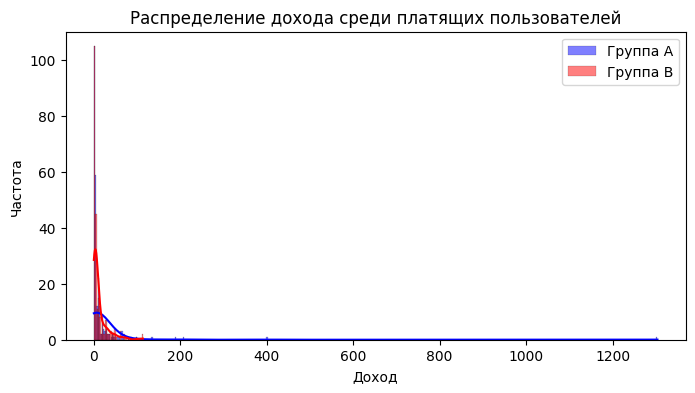

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.histplot(paying_users_A['revenue'], color="blue", label="Группа A", kde=True)
sns.histplot(paying_users_B['revenue'], color="red", label="Группа B", kde=True)
plt.title('Распределение дохода среди платящих пользователей')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [23]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(paying_users_A['revenue'], paying_users_B['revenue'], alternative='two-sided')
p_value

0.8871956616344514

Тест Манна-Уитни говорит о том, что значимых различий между группами нет, так как pvalue=0.88, что гораздо больше 5%-го уровня значимости, и тем более 1%-го.

Учитывая вышесказанное, нет необходимости применять альтернативный вариант, тестируемый в группе В, и оставить текущий вариант А.

Рекомендация:

Провести анализ других метрик или факторов, которые могут оказывать влияние на доходы. Например, рассмотреть влияние различных категорий пользователей или типов продуктов на доход, с последующим проведение A/B тестов.

